### Quick Webb Look Sample Notebook ###

This notebooks relies on the quickwebb set of routines to quickly do some common tasks.
- webbcrawl: Get info about files in a directory
- photnow: Do quick and dirty aperture photometry

This notebook also makes use of the jdaviz Imviz tool for designing the aperture for the photometry.

In [ ]:
import quickwebb as qw
%matplotlib inline

## Step 1: Crawl through a directory to get the data files

In [16]:
files = qw.webbcrawl('/Users/smullally/jwst/simulated_data/ngc346-mosaic/')

  INSTRUME MODULE  DETECTOR FILTER  PUPIL  EFFINTTM SUBARRAY TARGNAME PROGRAM
0   NIRCAM      A  NRCALONG  F444W  CLEAR  536.8385     FULL  UNKNOWN      34
1   NIRCAM      A     NRCA1  F115W  CLEAR  536.8385     FULL  UNKNOWN      34


In [17]:
#Notice that files also contains the path for easy access
print(files)

  INSTRUME MODULE  DETECTOR FILTER  PUPIL  EFFINTTM SUBARRAY TARGNAME PROGRAM  \
0   NIRCAM      A  NRCALONG  F444W  CLEAR  536.8385     FULL  UNKNOWN      34   
1   NIRCAM      A     NRCA1  F115W  CLEAR  536.8385     FULL  UNKNOWN      34   

                                                                                              PATH  
0  /Users/smullally/jwst/simulated_data/ngc346-mosaic/Pipeline_Level3/ngc346-f444w-mosaic_i2d.fits  
1  /Users/smullally/jwst/simulated_data/ngc346-mosaic/Pipeline_Level3/ngc346-f115w-mosaic_i2d.fits  


In [18]:
from jdaviz import Imviz
imviz = Imviz()
imviz.app


Application(config='imviz', events=['call_viewer_method', 'close_snackbar_message', 'data_item_selected', 'des…

In [19]:
imviz.load_data(files['PATH'][0])

In [21]:
regions = imviz.get_interactive_regions()
regions

{'Subset 1': <CirclePixelRegion(center=PixCoord(x=2159.6591796875, y=2736.8828125), radius=13.728515625)>}

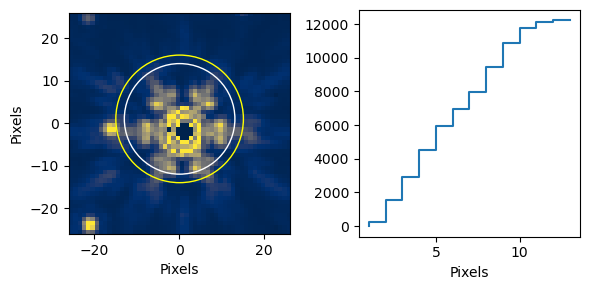

Aper. Photometry: 12232.193 +/-    86.272


In [22]:
regions['Subset 1'].center.xy
photometry = qw.photnow(files['PATH'][0], regions['Subset 1'].center.xy, radii_pixels=int(regions['Subset 1'].radius))

## Let's try the same thing on another data file in that directory

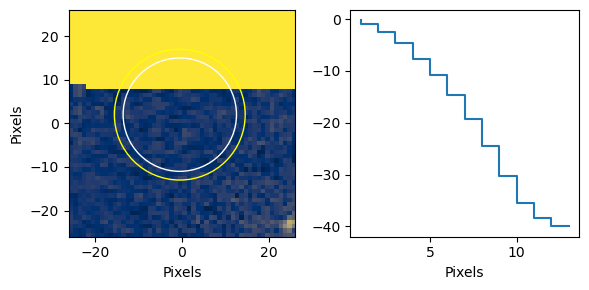

Aper. Photometry:   -39.986 +/-     4.087


In [23]:
photometry = qw.photnow(files['PATH'][1], regions['Subset 1'].center.xy, radii_pixels=int(regions['Subset 1'].radius))